# Credit_Card Churn Analysis

In [1]:
#import  the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# To read file
df = pd.read_csv(r'C:\Users\jayak\OneDrive\Desktop\Data analytics\python\EDA Project\credit_card_churn.csv')

In [3]:
#To remove duplicate
df.drop_duplicates()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39,5,1.0,3,12691.0,777,11914.0,1144,42
1,818770008,Existing Customer,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,6,1.0,2,8256.0,864,7392.0,1291,33
2,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1.0,0,3418.0,0,3418.0,1887,20
3,769911858,Existing Customer,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,3,4.0,1,3313.0,2517,796.0,1171,20
4,709106358,Existing Customer,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1.0,0,4716.0,0,4716.0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50.0,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2.0,3,4003.0,1851,2152.0,15476,117
10123,710638233,Attrited Customer,41.0,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2.0,3,4277.0,2186,2091.0,8764,69
10124,716506083,Attrited Customer,44.0,F,1,High School,Married,Less than $40K,Blue,36,5,3.0,4,5409.0,0,5409.0,10291,60
10125,717406983,Attrited Customer,30.0,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3.0,3,5281.0,0,5281.0,8395,62


In [4]:
# drop unwanted column & rename the column
df=df.drop(columns=['CLIENTNUM','Dependent_count'])
df.rename(columns={'Attrition_Flag':'Churn','Months_on_book':'tenure','Total_Revolving_Bal':'Avg_remaining_bal'},inplace =True)

In [5]:
# for looking the top 5 record of data
df.head()

,Churn,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,tenure,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_remaining_bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,45.0,M,High School,Married,$60K - $80K,Blue,39,5,1.0,3,12691.0,777,11914.0,1144,42
1,Existing Customer,49.0,F,Graduate,Single,Less than $40K,Blue,44,6,1.0,2,8256.0,864,7392.0,1291,33
2,Existing Customer,51.0,M,Graduate,Married,$80K - $120K,Blue,36,4,1.0,0,3418.0,0,3418.0,1887,20
3,Existing Customer,40.0,F,High School,Unknown,Less than $40K,Blue,34,3,4.0,1,3313.0,2517,796.0,1171,20
4,Existing Customer,40.0,M,Uneducated,Married,$60K - $80K,Blue,21,5,1.0,0,4716.0,0,4716.0,816,28


In [6]:
# To know the datatype of column
df.dtypes

Churn                        object
Customer_Age                float64
Gender                       object
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
tenure                        int64
Total_Relationship_Count      int64
Months_Inactive_12_mon      float64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Avg_remaining_bal             int64
Avg_Open_To_Buy             float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
dtype: object

In [7]:
# To know shape(row,column)
df.shape

(10127, 16)

In [8]:
# To know info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     10127 non-null  object 
 1   Customer_Age              10100 non-null  float64
 2   Gender                    10117 non-null  object 
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   tenure                    10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10122 non-null  float64
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Avg_remaining_bal         10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [9]:
# To find the null values in the data
df.isnull().sum()

Churn                        0
Customer_Age                27
Gender                      10
Education_Level              0
Marital_Status               0
Income_Category              0
Card_Category                0
tenure                       0
Total_Relationship_Count     0
Months_Inactive_12_mon       5
Contacts_Count_12_mon        0
Credit_Limit                 0
Avg_remaining_bal            0
Avg_Open_To_Buy              0
Total_Trans_Amt              0
Total_Trans_Ct               0
dtype: int64

From o/p It shows that  SeniorCitizen has **19** null values in the data


For this scenario

- Iam going to use **median()** fun for **Customer_Age** because it is a **Numerical value**.

In [10]:
x = df['Customer_Age'].median()
x

46.0

In [11]:
df['Customer_Age'].fillna(x, inplace = True)

 Another method to fill null values -- bfill() / ffill() function

In [12]:
df['Gender'] = df['Gender'].bfill()

In [13]:
df.isnull().sum()

Churn                       0
Customer_Age                0
Gender                      0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
tenure                      0
Total_Relationship_Count    0
Months_Inactive_12_mon      5
Contacts_Count_12_mon       0
Credit_Limit                0
Avg_remaining_bal           0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
dtype: int64

In [14]:
# Check the descriptive statistics of numeric variables
df.describe()

,Customer_Age,tenure,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_remaining_bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
count,10127.000000,10127.000000,10127.000000,10122.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.321319,35.928409,3.812580,2.341336,2.455317,8631.953698,1162.814061,7469.139637,4404.086304,64.858695
std,8.002780,7.986416,1.554408,1.010746,1.106225,9088.776650,814.987335,9090.685324,3397.129254,23.472570
min,26.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000
25%,41.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,2155.500000,45.000000
50%,46.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,3899.000000,67.000000
75%,52.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,4741.000000,81.000000
max,73.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,18484.000000,139.000000


- Only **25%** of customer are using  there **50%** of their carrd limit
- **25%** of customer are incative for more then  3 months

In [15]:
#To know the count of custoers are churn 
df['Churn'].value_counts()

Churn
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [16]:
#To know the count of custoers are churn  percentage
d=(df['Churn'].value_counts()/len(df['Churn'])* 100).round(2)

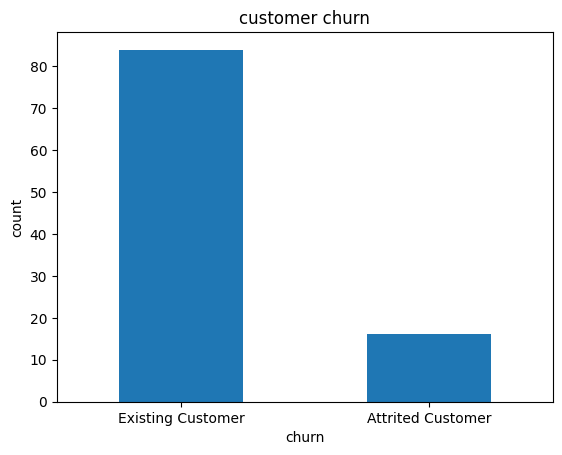

In [17]:
ax = d.plot(kind= 'bar')
ax.set_title('customer churn')
ax.set_xlabel('churn', loc="center")
ax.set_ylabel('count')
plt.xticks(rotation= 0)
plt.show()

Text(0.5, 0, 'months_inactive')

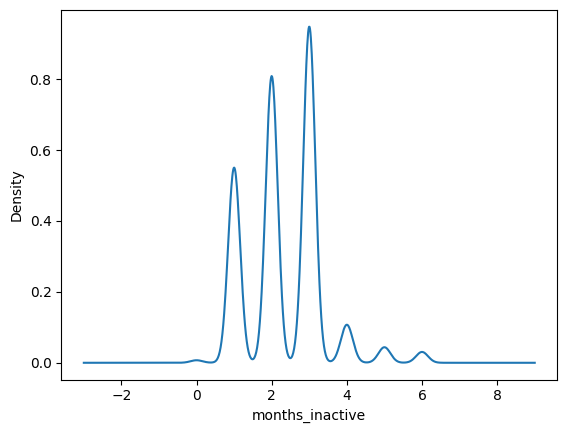

In [18]:
df['Months_Inactive_12_mon'].plot(kind='kde')
plt.xlabel("months_inactive")

- Customers Are Mostly inactive for 1-4 Months

In [19]:
df_y=df.copy()
df_y

,Churn,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,tenure,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_remaining_bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,45.0,M,High School,Married,$60K - $80K,Blue,39,5,1.0,3,12691.0,777,11914.0,1144,42
1,Existing Customer,49.0,F,Graduate,Single,Less than $40K,Blue,44,6,1.0,2,8256.0,864,7392.0,1291,33
2,Existing Customer,51.0,M,Graduate,Married,$80K - $120K,Blue,36,4,1.0,0,3418.0,0,3418.0,1887,20
3,Existing Customer,40.0,F,High School,Unknown,Less than $40K,Blue,34,3,4.0,1,3313.0,2517,796.0,1171,20
4,Existing Customer,40.0,M,Uneducated,Married,$60K - $80K,Blue,21,5,1.0,0,4716.0,0,4716.0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50.0,M,Graduate,Single,$40K - $60K,Blue,40,3,2.0,3,4003.0,1851,2152.0,15476,117
10123,Attrited Customer,41.0,M,Unknown,Divorced,$40K - $60K,Blue,25,4,2.0,3,4277.0,2186,2091.0,8764,69
10124,Attrited Customer,44.0,F,High School,Married,Less than $40K,Blue,36,5,3.0,4,5409.0,0,5409.0,10291,60
10125,Attrited Customer,30.0,M,Graduate,Unknown,$40K - $60K,Blue,36,4,3.0,3,5281.0,0,5281.0,8395,62


Grouping the values to geather for better understand of data

In [20]:
# Grouping the tenure values togeather
bin= [0,13,20,30,40,60]
labels = ['0-13','13-20','20-30','30-40','40-60']
df_y['tenure'] = pd.cut(df_y['tenure'], bins=bin, labels=labels, right=False)

In [21]:
# Grouping the Total_Trans_Amt values togeather
bins= [0,5000,10000,15000,20000]
labels = ['10k-50k','50k-10k','100k-150k','150-200k']
df_y['Total_Trans_Amt'] = pd.cut(df_y['Total_Trans_Amt'], bins=bins, labels=labels, right=False)

In [22]:
# Grouping the Avg_Remaining_Bal values togeather
bins= [0,500,1000,1500,2000,2600]
labels = ['0-5k','5-10k','10-15k','15-20k','20-26k']
df_y['Avg_remaining_bal'] = pd.cut(df_y['Avg_remaining_bal'], bins=bins, labels=labels, right=False)

In [23]:
# Grouping the Avg_Open_To_By values togeather
bins= [0,5000,10000,15000,20000,25000,30000,35000]
labels = ['10k-50k','50k-10k','100k-150k','150-200k','200-250k','250-300k','300-350k']
df_y['Avg_Open_To_Buy'] = pd.cut(df_y['Avg_Open_To_Buy'], bins=bins, labels=labels, right=False)

In [24]:
# Grouping the Credit_Age values togeather
bins= [0,5000,10000,15000,20000,25000,30000,35000]
labels = ['10k-50k','50k-10k','100k-150k','150-200k','200-250k','250-300k','300-350k']
df_y['Credit_Limit'] = pd.cut(df_y['Credit_Limit'], bins=bins, labels=labels, right=False)


In [25]:
# Grouping the customer_age values togeather
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df_y['Customer_Age'] = pd.cut(df_y.Customer_Age, range(1, 80, 12), right=False, labels=labels)

In [26]:
# Grouping the customer_age values togeather
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 140, 12)]
df_y['Total_Trans_Ct'] = pd.cut(df_y.Total_Trans_Ct, range(1, 150, 12), right=False, labels=labels)

## Data Analysis

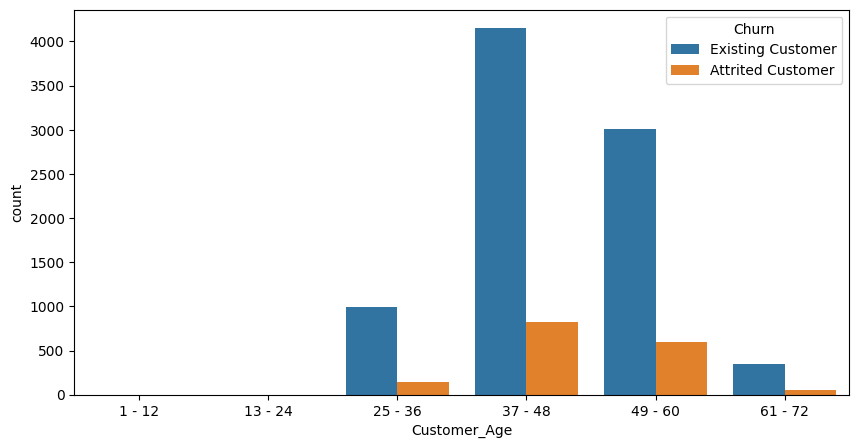

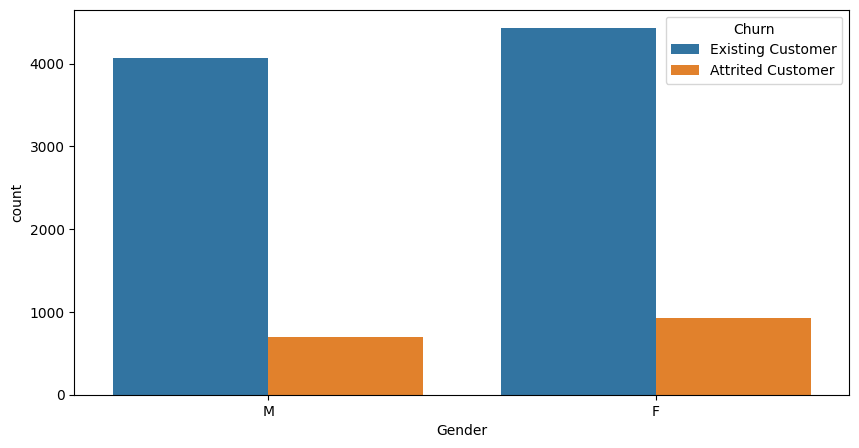

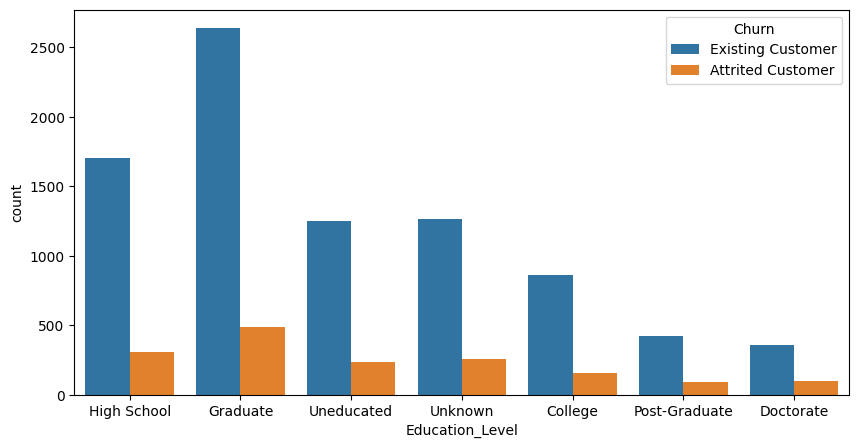

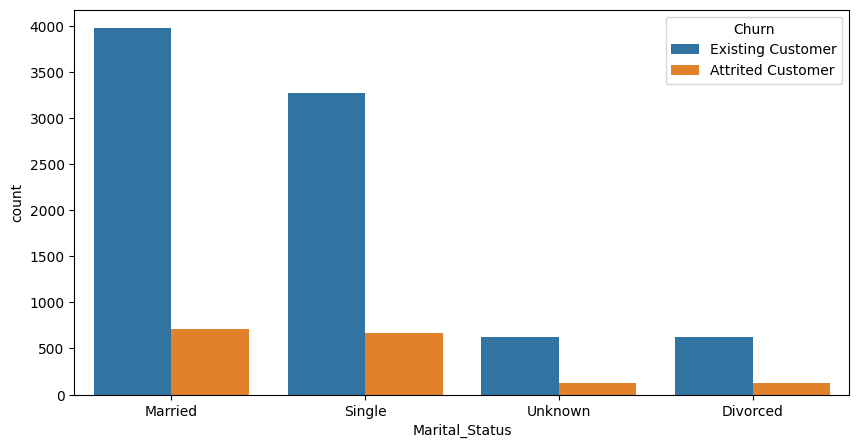

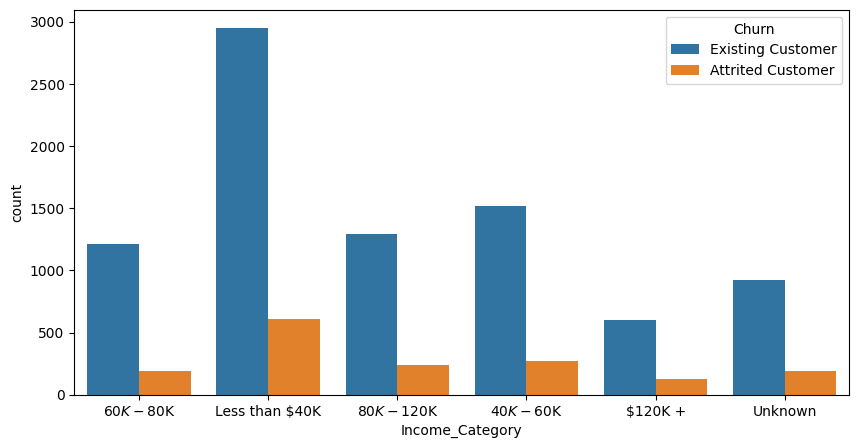

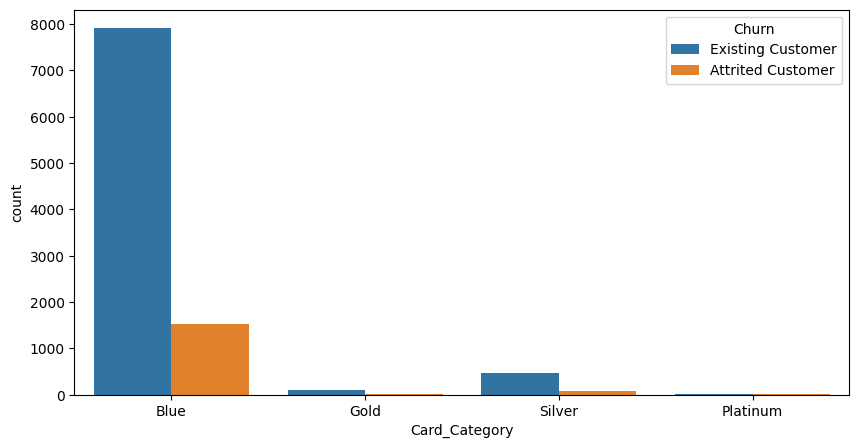

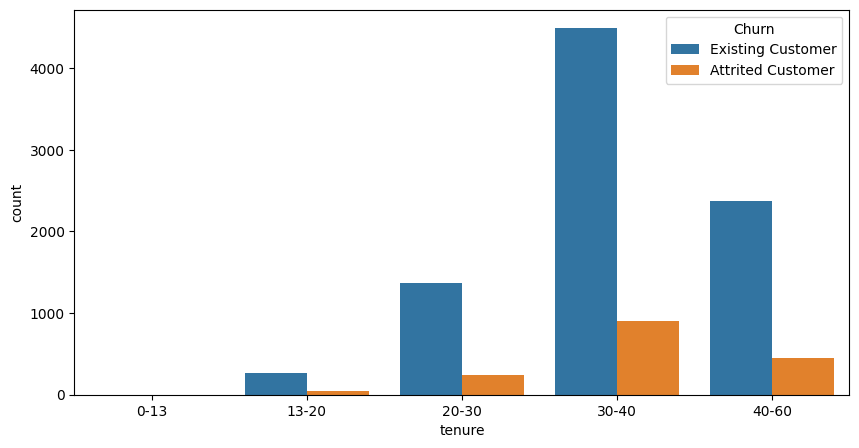

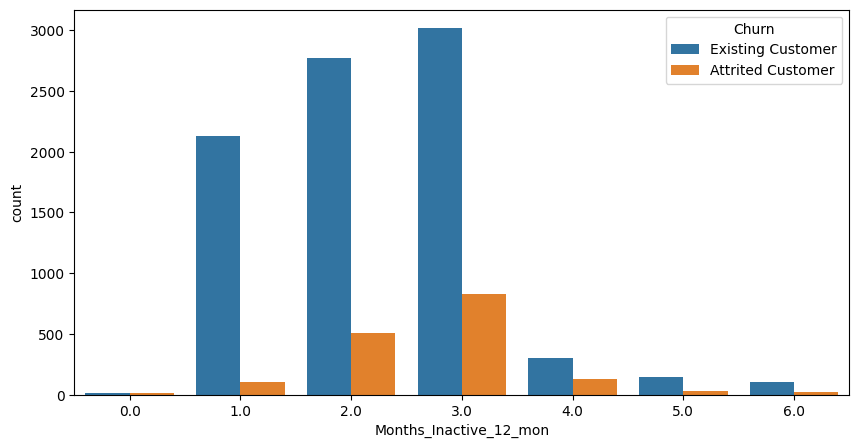

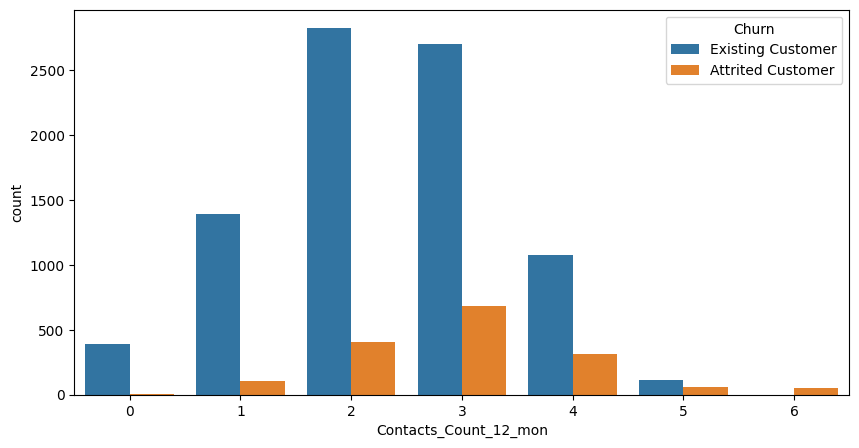

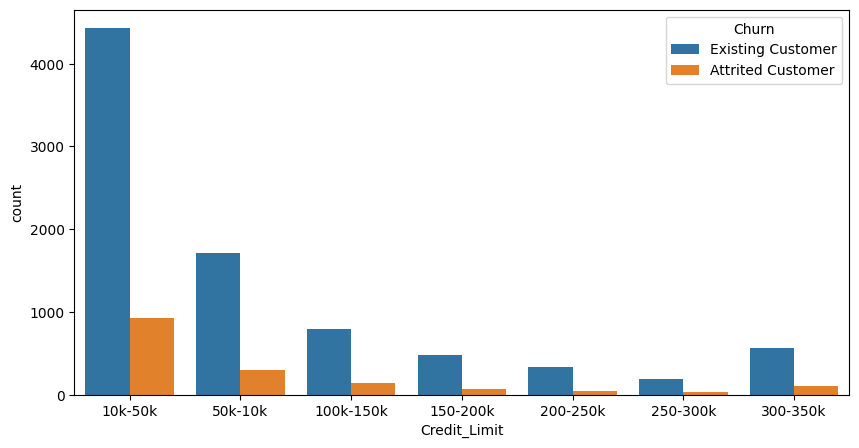

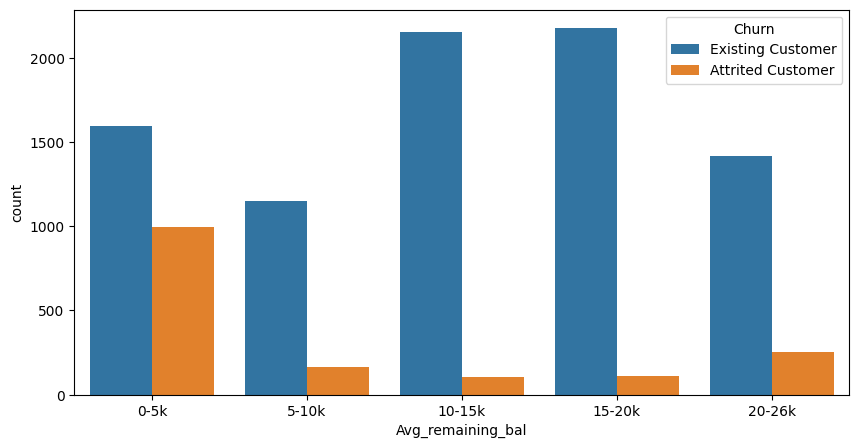

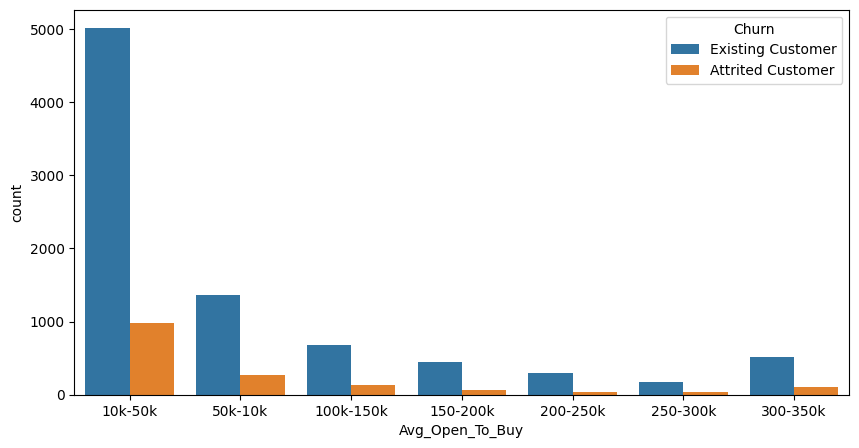

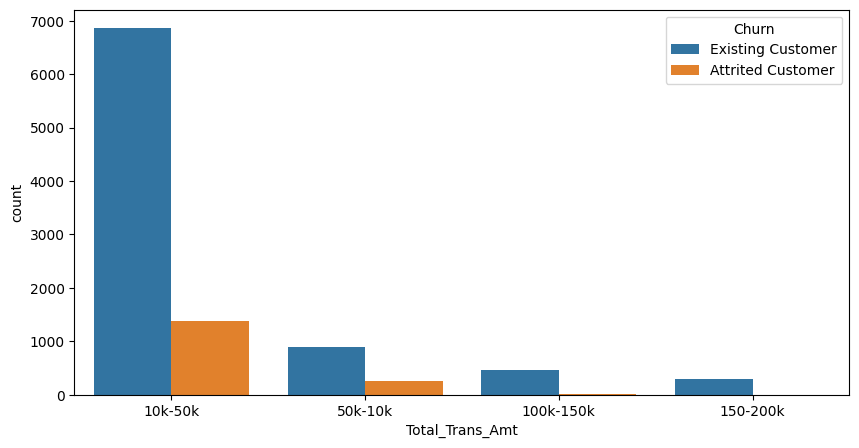

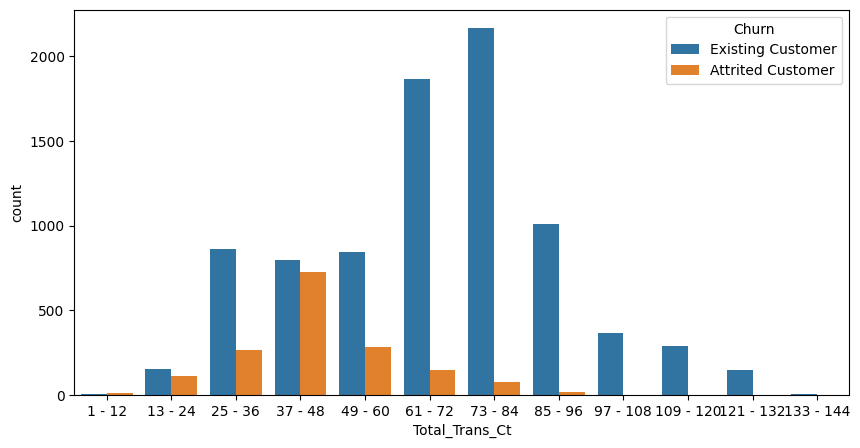

In [27]:
for i,a in enumerate(df_y.drop(columns=['Churn','Total_Relationship_Count'])):
    plt.figure(i,figsize=(10,5))
    sns.countplot(data=df_y,x=a,hue='Churn',)

In [28]:
# Conveting Data to Dummies(Feature Encoding)
d2= pd.get_dummies(df,dtype=int)
d2.head()

,Customer_Age,tenure,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_remaining_bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45.0,39,5,1.0,3,12691.0,777,11914.0,1144,42,...,0,0,1,0,0,0,1,0,0,0
1,49.0,44,6,1.0,2,8256.0,864,7392.0,1291,33,...,0,0,0,0,1,0,1,0,0,0
2,51.0,36,4,1.0,0,3418.0,0,3418.0,1887,20,...,0,0,0,1,0,0,1,0,0,0
3,40.0,34,3,4.0,1,3313.0,2517,796.0,1171,20,...,0,0,0,0,1,0,1,0,0,0
4,40.0,21,5,1.0,0,4716.0,0,4716.0,816,28,...,0,0,1,0,0,0,1,0,0,0


 Convert the target variable 'Churn'  in a binary numeric variable i.e. Attrited Customer=1 ; Existing Customer = 0

In [29]:
df_y['Churn'] = np.where(df_y.Churn == 'Existing Customer',0,1).copy()

In [30]:
df_y['Churn'].value_counts()

Churn
0    8500
1    1627
Name: count, dtype: int64

Convert all the categorical variables into dummy variables

In [31]:
d2= pd.get_dummies(df_y,dtype=int)
d2.head()

,Churn,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Customer_Age_1 - 12,Customer_Age_13 - 24,Customer_Age_25 - 36,Customer_Age_37 - 48,Customer_Age_49 - 60,Customer_Age_61 - 72,...,Total_Trans_Ct_25 - 36,Total_Trans_Ct_37 - 48,Total_Trans_Ct_49 - 60,Total_Trans_Ct_61 - 72,Total_Trans_Ct_73 - 84,Total_Trans_Ct_85 - 96,Total_Trans_Ct_97 - 108,Total_Trans_Ct_109 - 120,Total_Trans_Ct_121 - 132,Total_Trans_Ct_133 - 144
0,0,5,1.0,3,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,6,1.0,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,4,1.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,4.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,5,1.0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


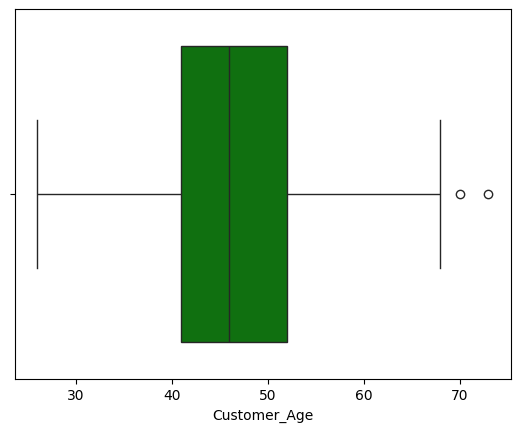

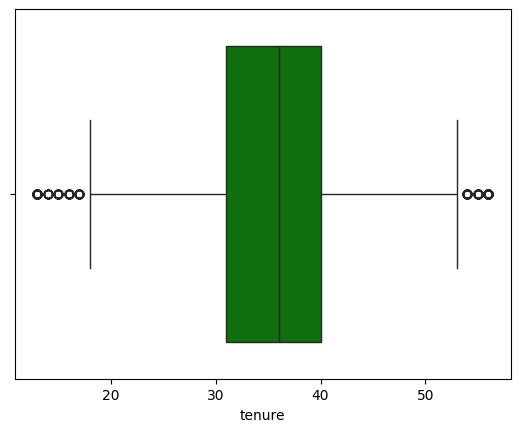

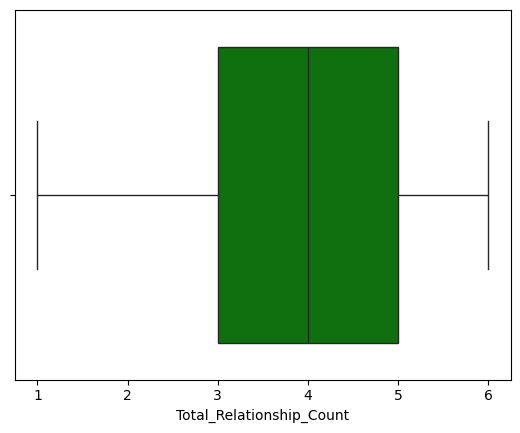

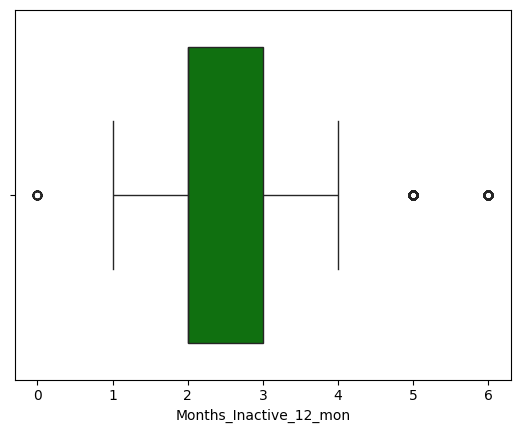

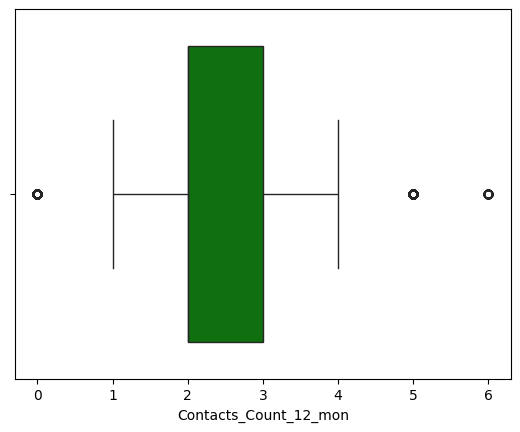

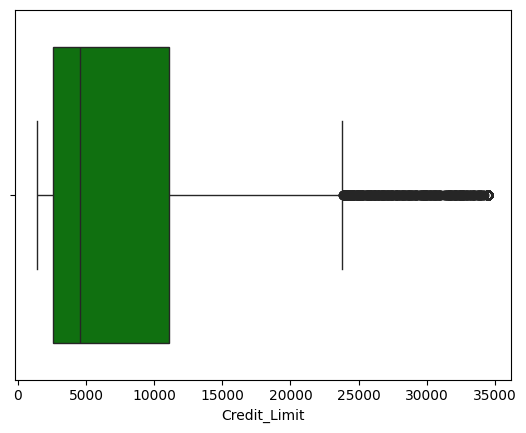

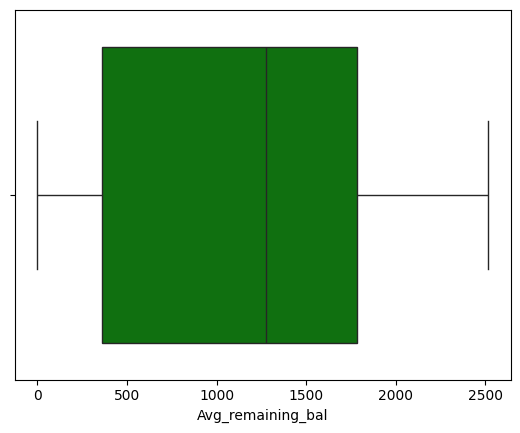

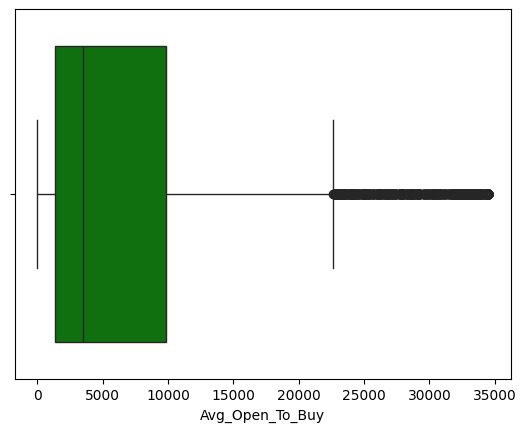

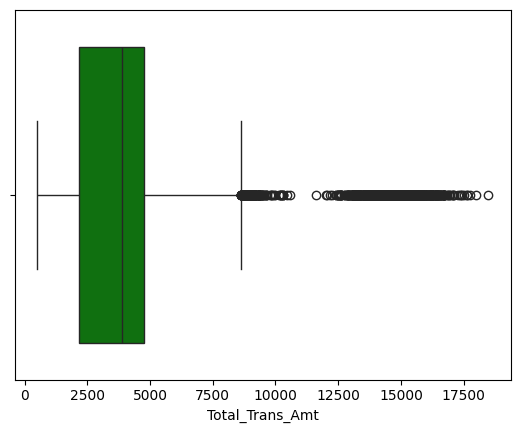

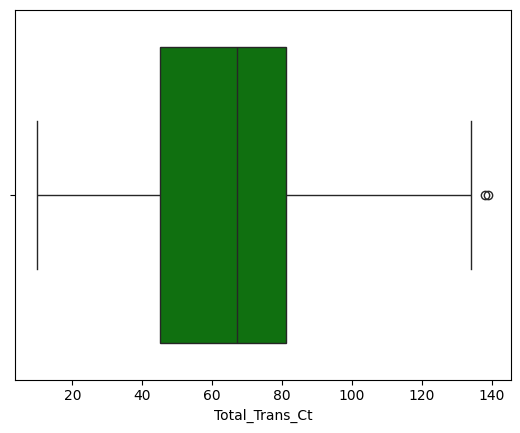

In [32]:
# To Find Outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i,color="g")
    plt.show()

<Axes: >

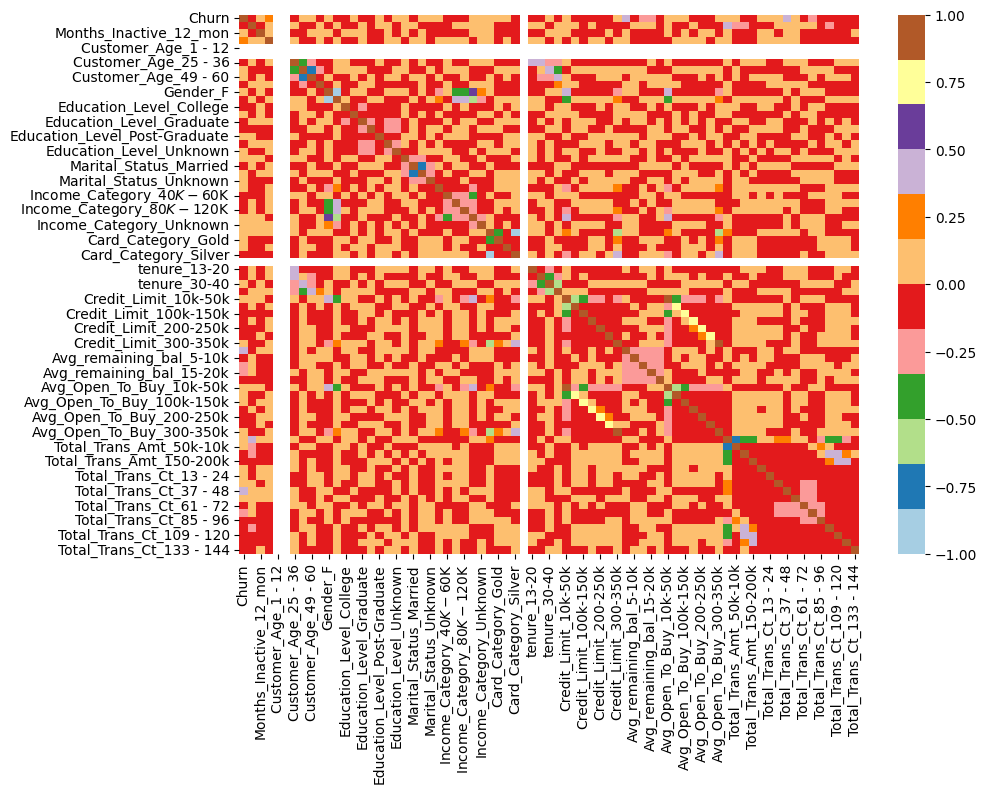

In [33]:
# Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(d2.corr(), cmap="Paired")

<Axes: >

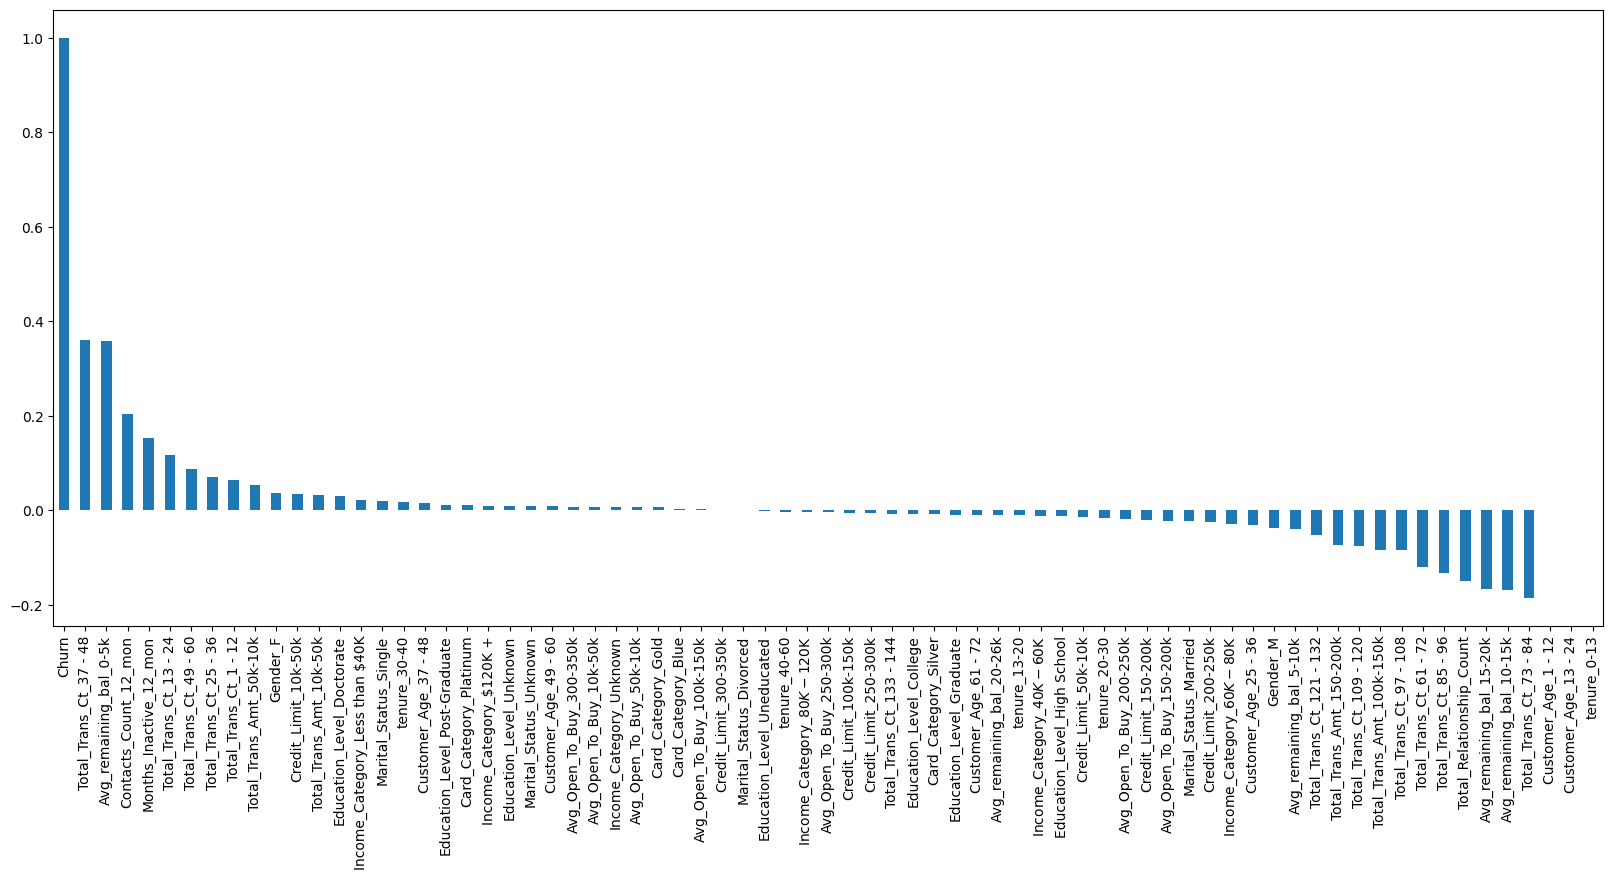

In [34]:
plt.figure(figsize=(20,8))
d2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

C:\Users\jayak\AppData\Local\Temp\ipykernel_27200\2567090840.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(d2.Total_Relationship_Count[d2["Churn"] == 0 ],
C:\Users\jayak\AppData\Local\Temp\ipykernel_27200\2567090840.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(d2.Total_Relationship_Count[d2["Churn"] == 1 ],


Text(0.5, 1.0, 'Total Total_Relationship_Count by churn')

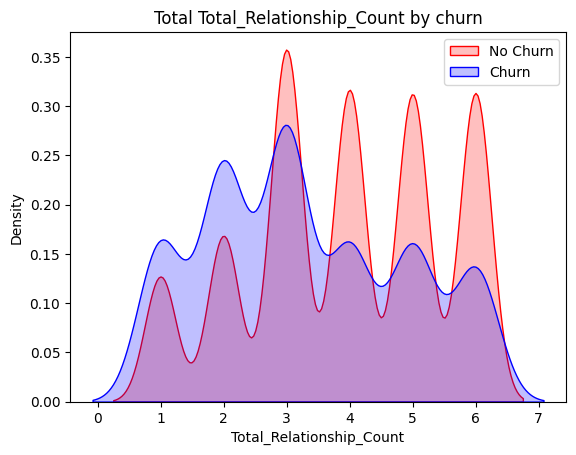

In [35]:
Tot = sns.kdeplot(d2.Total_Relationship_Count[d2["Churn"] == 0 ],
                color="Red", shade = True)
Tot = sns.kdeplot(d2.Total_Relationship_Count[d2["Churn"] == 1 ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total_Relationship_Count')
Tot.set_title('Total Total_Relationship_Count by churn')

C:\Users\jayak\AppData\Local\Temp\ipykernel_27200\1118564366.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(d2.Months_Inactive_12_mon[(d2["Churn"] == 0) ],
C:\Users\jayak\AppData\Local\Temp\ipykernel_27200\1118564366.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(d2.Months_Inactive_12_mon[(d2["Churn"] == 1) ],


Text(0.5, 1.0, 'Total Months_Inactive_12_mon by churn')

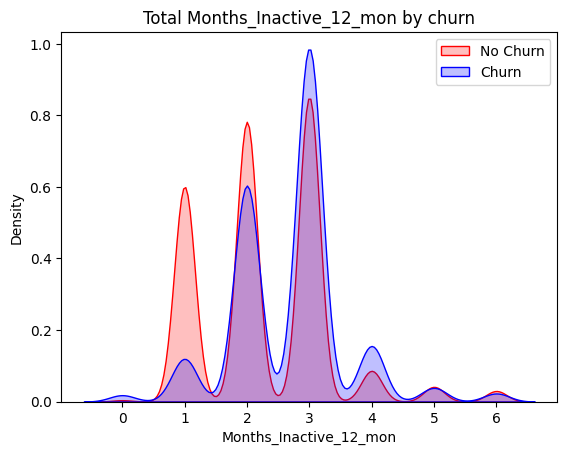

In [38]:
Tot = sns.kdeplot(d2.Months_Inactive_12_mon[(d2["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(d2.Months_Inactive_12_mon[(d2["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Months_Inactive_12_mon')
Tot.set_title('Total Months_Inactive_12_mon by churn')

# CONCLUSION

These are some of the quick insights from this Data:

- Customer_Age **("37-48")** Are More Churn.
- High_School And Graduate Are more Churn.
- Married , Income Less Then $40K , blue card Holder ,Tenure 30-40 And Less Credit_Card_limit Are More Churn.

In [37]:
#d2.to_csv('Credit_Card_churn_Analysis.csv')